# Human Activity Recognition from Smart Watches

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading all features from features.txt

In [9]:
features_path = "./UCI HAR Dataset/features.txt"

In [10]:
with open(features_path,"r") as f:
     feature_names = [line.split()[1] for line in f.readlines()]
print("Total no.of feature : ",len(feature_names))

Total no.of feature :  561


few of the feature names are repeated so we'll rename them with suffix of their index number

In [11]:
n = np.array(feature_names)
print("No,of unique feature names: ",len(np.unique(n)))

No,of unique feature names:  477


In [12]:
final_features = []
for i in range(len(feature_names)):
    if feature_names[i] not in final_features:
        final_features.append(feature_names[i])
    else:
        final_features.append(feature_names[i]+str(i))

In [13]:
len(final_features)

561

In [14]:
final_features

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [15]:
labels = {1:"Walking",2:"Walking_UP",3:"Walking_DOWN",4: "Sitting",5:"Standing",6:"Laying"}

Reading train Data

In [16]:
xTrain = pd.read_csv("./UCI HAR Dataset/train/X_train.txt",
                     names=final_features,delim_whitespace=True,header=None)
xTrain["subjects"] = pd.read_csv("./UCI HAR Dataset/train/subject_train.txt",header=None,squeeze=True)

yTrain = pd.read_csv(".//UCI HAR Dataset/train/y_train.txt",header=None,names=["activity_labels"],squeeze=True)

In [17]:
yTrain_labels = yTrain.map(labels)

In [18]:
train = xTrain
train["Activity"] = yTrain
train["Activity Labels"] = yTrain_labels
train.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subjects,Activity,Activity Labels
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,Standing
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,Standing
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,Standing
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,Standing
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,Standing
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,5,Standing
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,5,Standing
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,5,Standing
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,5,Standing
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,5,Standing


In [19]:
train.shape

(7352, 564)

Reading Test data

In [21]:
xTest = pd.read_csv("./UCI HAR Dataset/test/x_test.txt",
                  delim_whitespace=True,header=None,names=final_features)
xTest['subjects'] = pd.read_csv("./UCI HAR Dataset/test/subject_test.txt",
                               header=None,squeeze=True)

In [22]:
yTest = pd.read_csv('./UCI HAR Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
yTest_labels = yTest.map(labels)

test = xTest
test['Activity'] = yTest
test['Activity Labels'] = yTest_labels

In [23]:
test.shape

(2947, 564)

### Checking for Null values in the data

In [24]:
print("No.of null values in the Train data: ",train.isnull().sum().sum())
print("No.of null values in the Test data: ",test.isnull().sum().sum())

No.of null values in the Train data:  0
No.of null values in the Test data:  0


### Checking for Duplicate Values

In [25]:
print("No.of duplicated rows in Train data: ",train.duplicated().sum())
print("No.of duplicated rows in test data: ",test.duplicated().sum())

No.of duplicated rows in Train data:  0
No.of duplicated rows in test data:  0


### Checking for data balance for classification in train data

In [ ]:
train["Activity"].value_counts()

In [26]:
import seaborn as sns

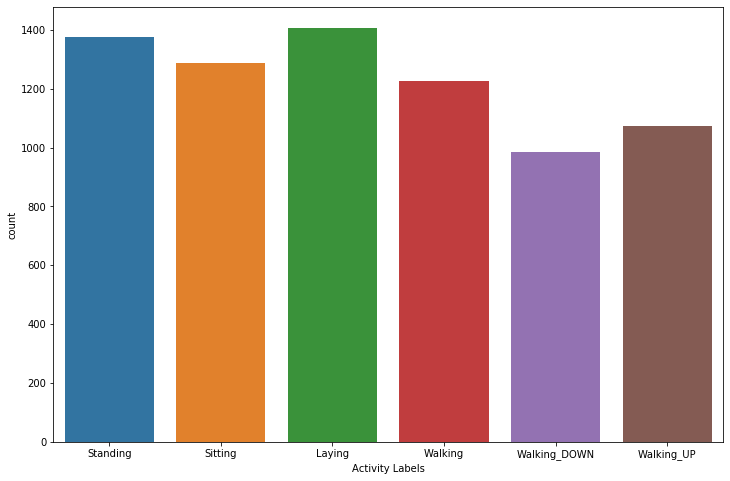

In [27]:
plt.figure(figsize=(12,8))
sns.countplot("Activity Labels",data=train)
plt.show()

Data is almost balanced for classification

### Checking for data distribution for each person in the train data

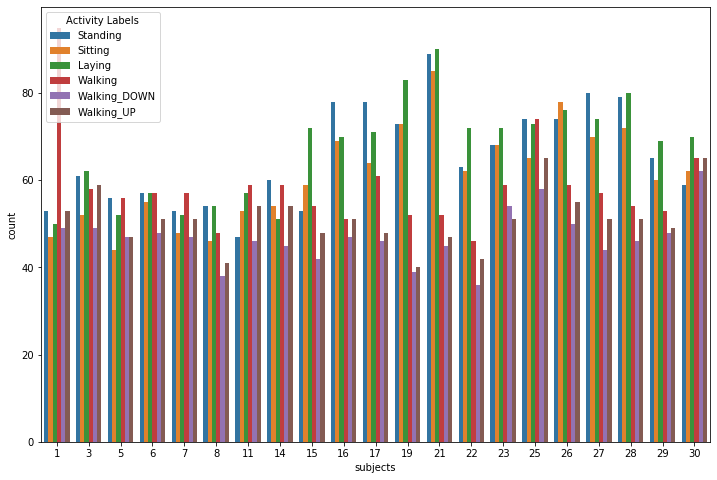

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x="subjects",hue="Activity Labels",data=train)
plt.show()

Finalising the data by removing special characters from column names in train and test data

In [29]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

In [34]:
train.to_csv("train.csv",index=False)
test.to_csv("test.csv",index=False)

## Applying t-sne to Visualize features in the train data

In [30]:
from sklearn.manifold import TSNE

In [31]:
perplexities = [5,10,15,20,30,40,50,60,70]

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.230s...
[t-SNE] Computed neighbors for 7352 samples in 32.283s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.845337
[t-SNE] KL divergence after 1000 iterations: 1.562987


/Users/santu/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


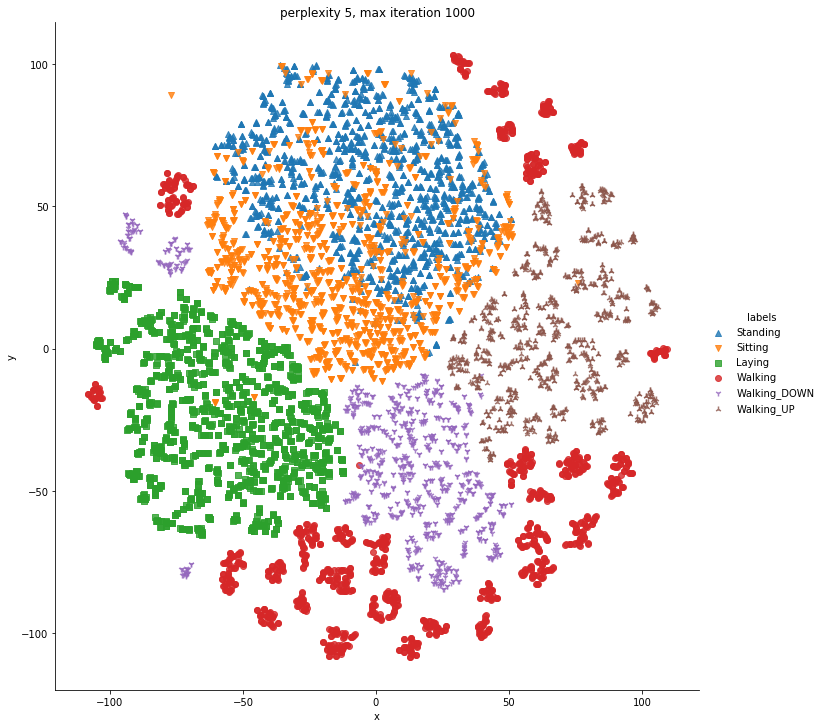

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.219s...
[t-SNE] Computed neighbors for 7352 samples in 32.347s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.283401
[t-SNE] KL divergence after 1000 iterations: 1.498392


/Users/santu/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


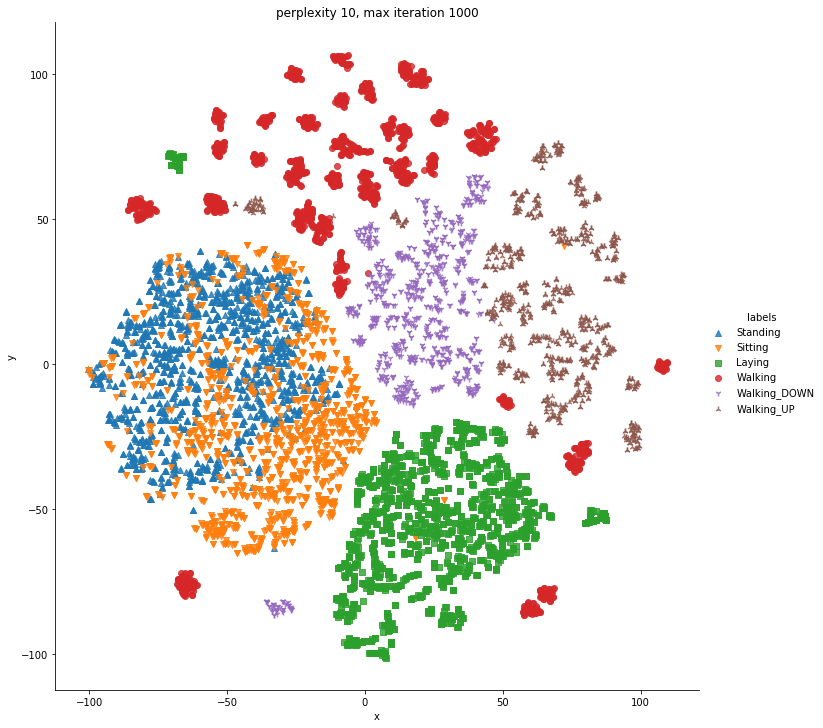

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.225s...
[t-SNE] Computed neighbors for 7352 samples in 31.686s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.218608
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.588860
[t-SNE] KL divergence after 1000 iterations: 1.447370


/Users/santu/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


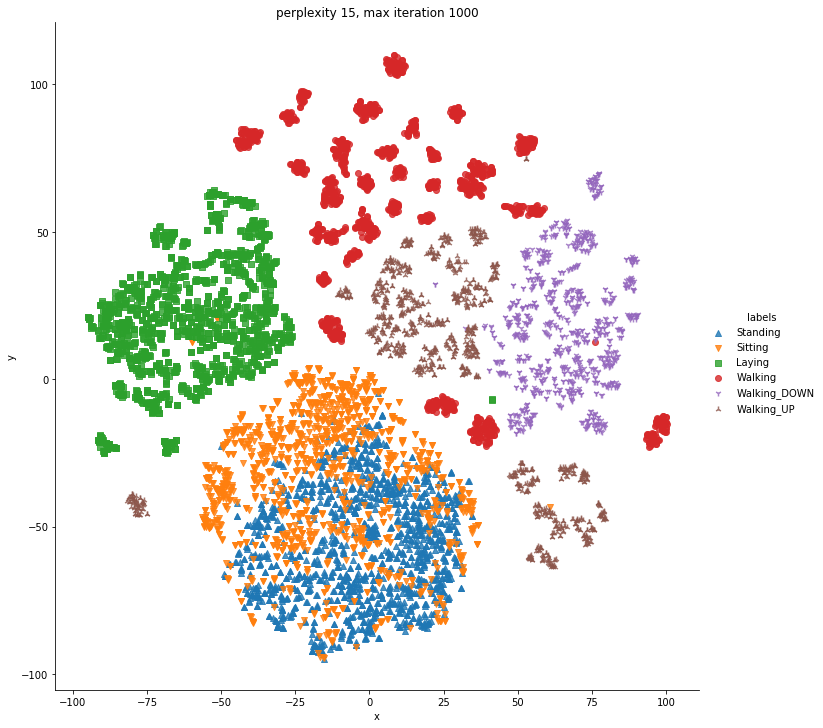

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.264s...
[t-SNE] Computed neighbors for 7352 samples in 34.780s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.757263
[t-SNE] KL divergence after 1000 iterations: 1.414202


/Users/santu/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


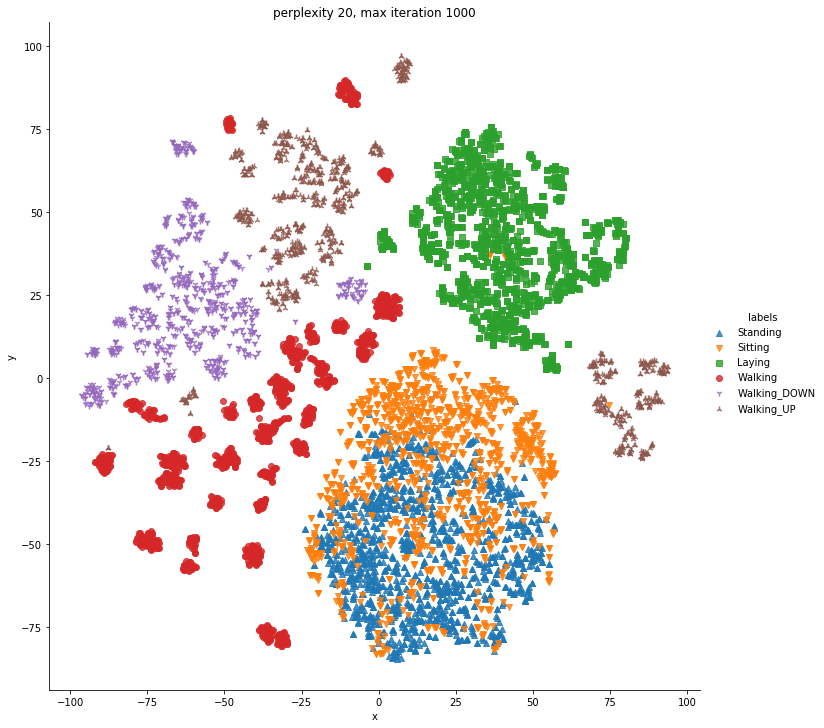

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.218s...
[t-SNE] Computed neighbors for 7352 samples in 35.514s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.348516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.009537
[t-SNE] KL divergence after 1000 iterations: 1.364210


/Users/santu/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


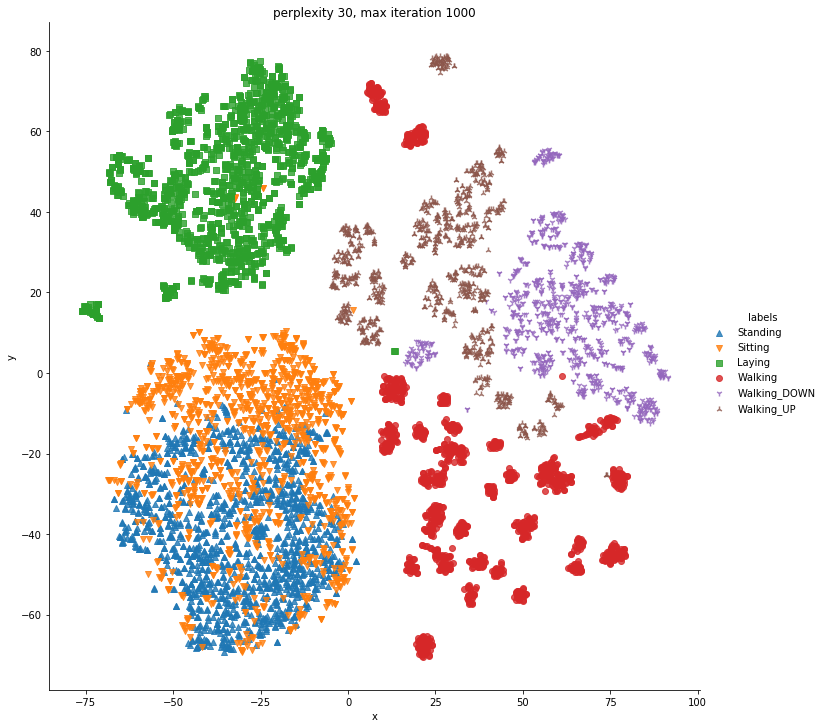

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.220s...
[t-SNE] Computed neighbors for 7352 samples in 31.985s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.399086
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.926682
[t-SNE] KL divergence after 1000 iterations: 1.323863


/Users/santu/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


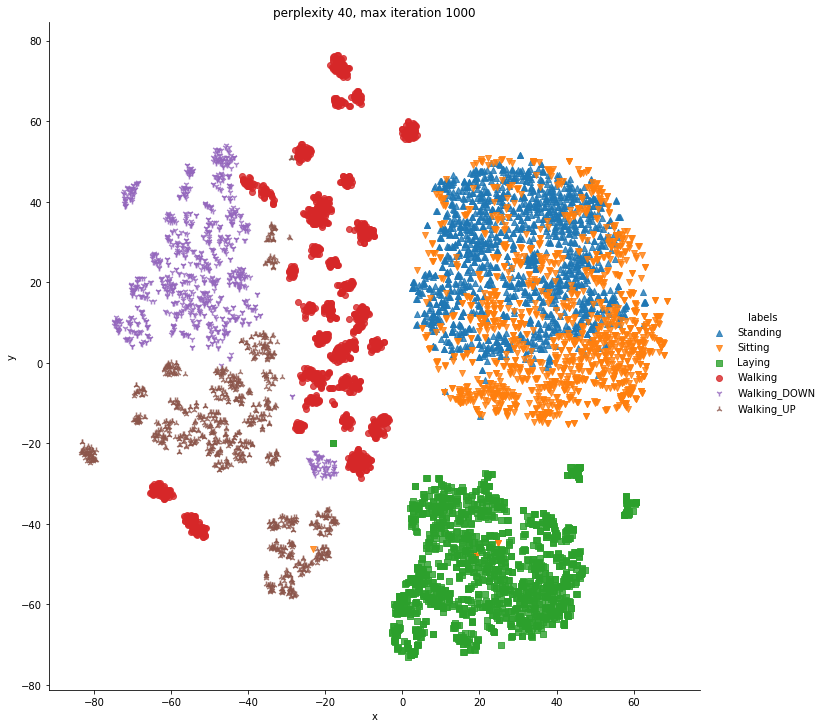

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.217s...
[t-SNE] Computed neighbors for 7352 samples in 32.163s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.125496
[t-SNE] KL divergence after 1000 iterations: 1.289432


/Users/santu/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


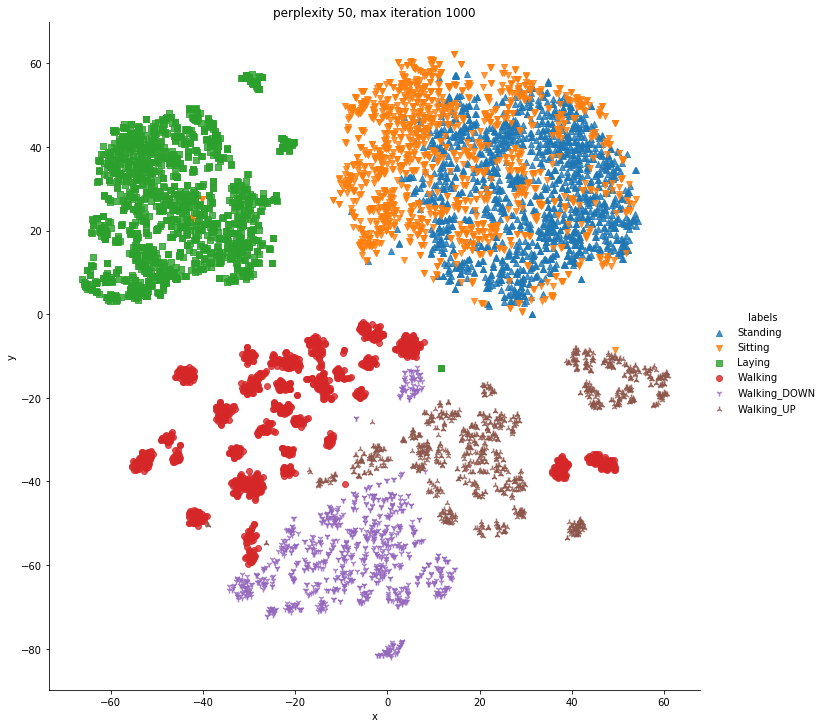

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.215s...
[t-SNE] Computed neighbors for 7352 samples in 32.124s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.469101
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.631149
[t-SNE] KL divergence after 1000 iterations: 1.253399


/Users/santu/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


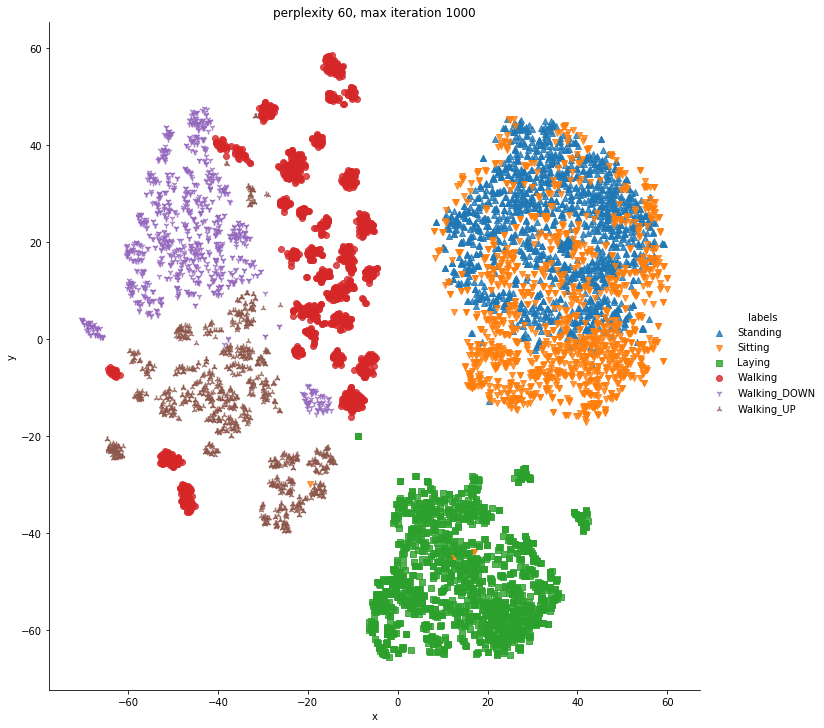

[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.218s...
[t-SNE] Computed neighbors for 7352 samples in 32.411s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.495801
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.266731
[t-SNE] KL divergence after 1000 iterations: 1.222009


/Users/santu/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


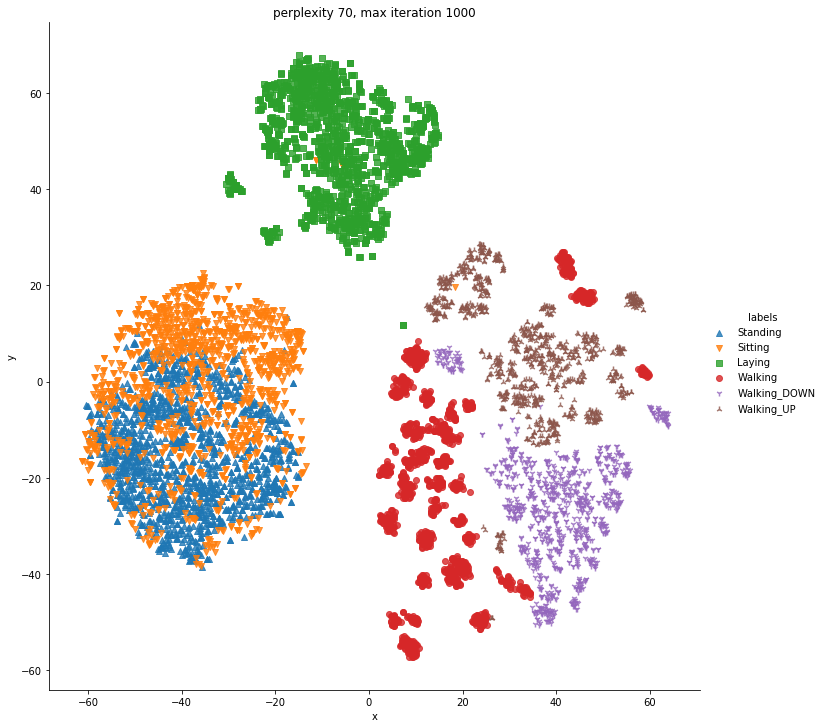

In [32]:
data = xTrain.drop(["subjects","Activity","Activity Labels"],axis="columns")
for i,p in enumerate(perplexities):
    tsne_obj = TSNE(perplexity=p,n_iter=1000,verbose=1)
    xDim_reduced = tsne_obj.fit_transform(data)
    tsne_dataframe = pd.DataFrame({"x" : xDim_reduced[:,0],"y":xDim_reduced[:,1],"labels" :train["Activity Labels"]})
    sns.lmplot(x = "x",y='y',hue="labels",data=tsne_dataframe,fit_reg=False,markers=['^','v','s','o', '1','2'],size=10)
    plt.title("perplexity {}, max iteration {}".format(p,1000))
    plt.show()
    

In all the perplexities Standing and sitting dataponts are very closely related. may be this is due to the data collection procedure as they have collected the data by holding the smatphone at subjects/volunteer's waist. reading that phone has capture is corelated when siting and standing

### Model Building

#### Logistic Regression 

In [161]:
x_Train = train.drop(labels=["subjects","Activity","Activity Labels"],axis="columns")
y_Train = train["Activity Labels"]

In [162]:
print(x_Train.shape,y_Train.shape)

(7352, 561) (7352,)


In [163]:
x_Test = test.drop(labels=["subjects","Activity","Activity Labels"],axis="columns")
y_Test = test["Activity Labels"]
print(x_Test.shape,y_Test.shape)

(2947, 561) (2947,)


In [226]:
class_labels = ['Walking','Walking_UP',"Walking_DOWN","Sitting","Standing","Laying"]

In [227]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [135]:
scaler = StandardScaler()
scaler.fit(x_Train)
x_Train_scaled = scaler.transform(x_Train)

scaler.fit(x_Test)
x_Test_scaled = scaler.transform(x_Test)

In [221]:
lr = LogisticRegression(C=30)
lr.fit(x_Train,y_Train)

LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [222]:
preds = lr.predict(x_Test)

In [225]:
metrics.accuracy_score(y_Test,preds)

0.9596199524940617

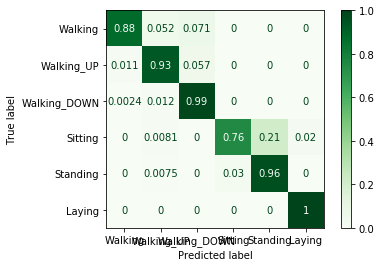

In [239]:
x = plot_confusion_matrix(lr,x_Test_scaled,y_Test,labels=class_labels,normalize='true',cmap=plt.cm.Greens,)
plt.show()

In [250]:
x = metrics.classification_report(y_Test,preds)
print(x)

              precision    recall  f1-score   support

      Laying       1.00      1.00      1.00       537
     Sitting       0.97      0.87      0.92       491
    Standing       0.89      0.98      0.93       532
     Walking       0.96      0.99      0.97       496
Walking_DOWN       0.98      0.96      0.97       420
  Walking_UP       0.97      0.95      0.96       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



## SVM

In [258]:
from sklearn.svm import LinearSVC

In [259]:
params = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC()
grid = GridSearchCV(lr_svc,param_grid=params,n_jobs=-1,
                   verbose=2)
grid.fit(x_Train_scaled,y_Train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   24.1s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.125, 0.5, 1, 2, 8, 16]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [260]:
grid.best_score_

0.9407057996550081

In [261]:
grid.best_params_

{'C': 0.125}

In [262]:
lr_svc = grid.best_estimator_
lr_svc

LinearSVC(C=0.125, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [264]:
lr_svc.fit(x_Train_scaled,y_Train)
preds = lr_svc.predict(x_Test_scaled)
print("Accuracy using Linear SVM : ",metrics.accuracy_score(y_Test,preds))

Accuracy using Linear SVM :  0.9626739056667798


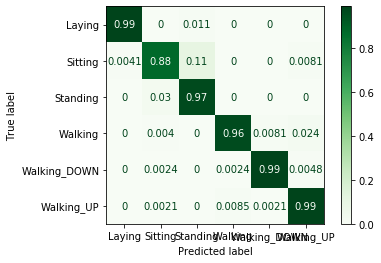

In [267]:
plot_confusion_matrix(lr_svc,x_Test_scaled,
                      y_Test,cmap=plt.cm.Greens,
                     normalize='true')

In [272]:
x = metrics.classification_report(y_Test,preds)
print(x)

              precision    recall  f1-score   support

      Laying       1.00      0.99      0.99       537
     Sitting       0.96      0.88      0.92       491
    Standing       0.90      0.97      0.93       532
     Walking       0.99      0.96      0.98       496
Walking_DOWN       0.99      0.99      0.99       420
  Walking_UP       0.96      0.99      0.97       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



Linear SVM is out performed the classification task. So Save the model for feature use

In [279]:
import pickle

In [280]:
with open("linear_svm_model.pkl",'wb') as file:
    pickle.dump(lr_svc,file)

In [1]:
import pickle

In [3]:
with open("linear_svm_model.pkl",'rb') as file:
    model = pickle.load(file)

In [5]:
model.predict()

<bound method LinearClassifierMixin.predict of LinearSVC(C=0.125, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)>

In [35]:
test = test.drop(['subjects',"Activity","Activity Labels"],axis='columns')
sample = test.sample(100)
sample.to_csv("sampletest.csv",index=False)